In [69]:

import ibmos2spark

# @hidden_cell
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': '9c3f50be95b04893a94f757a88f7e9e6',
    'region': 'dallas',
    'user_id': '111a41964b1443c1b39207aab9c623f4',
    'username': 'member_09ebbb8d00b68e5aa1c237063179f5a1186d97b4',
    'password': 'tLnFLnx38X-{e8y/'
}

configuration_name = 'os_9b3912dc52ce4190b241f8f14f51777f_configs'
bmos = ibmos2spark.bluemix(sc, credentials, configuration_name)

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(bmos.url('DefaultProjectankitbharadiyasjsuedu', 'Outpatient_Prospective_Payment_System__OPPS__Provider_Summary_for_30_Selected_Ambulatory_Payment_Classification__APC__Groups_-_CY2013.csv'))
df_data_1.take(5)


[Row(Ambulatory Payment Classification (APC) Group=u'0013 - Level II Debridement & Destruction', Provider Id=u'010001', Provider Name=u'SOUTHEAST ALABAMA MEDICAL CENTER', Provider Street Address=u'1108 ROSS CLARK CIRCLE', Provider City=u'DOTHAN', Provider State=u'AL', Provider Zip Code=u'36301', Provider HRR=u'AL - Dothan', Outpatient Services=u'639', Average  Estimated Submitted Charges=u'$391.64', Average Total Payments=u'$54.94'),
 Row(Ambulatory Payment Classification (APC) Group=u'0015 - Level III Debridement & Destruction', Provider Id=u'010001', Provider Name=u'SOUTHEAST ALABAMA MEDICAL CENTER', Provider Street Address=u'1108 ROSS CLARK CIRCLE', Provider City=u'DOTHAN', Provider State=u'AL', Provider Zip Code=u'36301', Provider HRR=u'AL - Dothan', Outpatient Services=u'503', Average  Estimated Submitted Charges=u'$595.82', Average Total Payments=u'$83.51'),
 Row(Ambulatory Payment Classification (APC) Group=u'0019 - Level I Excision/ Biopsy', Provider Id=u'010001', Provider Name

# Registering the given data frame as a temporary table in the catalog

In [70]:
sqlContext.registerDataFrameAsTable(df_data_1, "payments");

# Verifying that the table has been created with the given data frame

In [71]:
data = spark.sql("SELECT COUNT(*) FROM payments");
data.show()

+--------+
|count(1)|
+--------+
|   44355|
+--------+



# Use Case 1: We want to know the charges and payment information of outpatients serivces that are greater than 100 within the area with zip code 35631

In [72]:
case1 = spark.sql("SELECT `Provider Zip Code`,`Outpatient Services`,`Average  Estimated Submitted Charges`,`Average Total Payments` FROM payments WHERE `Provider Zip Code` = 35631 AND int(`Outpatient Services`) > 100")
case1.show()

+-----------------+-------------------+------------------------------------+----------------------+
|Provider Zip Code|Outpatient Services|Average  Estimated Submitted Charges|Average Total Payments|
+-----------------+-------------------+------------------------------------+----------------------+
|            35631|               1481|                             $303.69|                $83.40|
|            35631|                494|                            $3575.57|               $664.47|
|            35631|                435|                             $538.99|                $54.23|
|            35631|                754|                            $1032.68|               $129.24|
|            35631|                492|                            $1543.54|               $323.76|
|            35631|                762|                            $1220.94|               $293.75|
|            35631|                551|                             $256.76|                $61.49|


# Use Case 2: We want to know top 20 providers across the country with the highest number of outpatient services for level 2 hospital clinic visits with their average submitted charges

In [73]:
case2 = spark.sql("SELECT `Provider Name`,`Provider City`,`Provider State`,`Provider Zip Code`,`Outpatient Services`,`Average  Estimated Submitted Charges` FROM payments WHERE `Ambulatory Payment Classification (APC) Group` = '0605 - Level 2 Hospital Clinic Visits' ORDER BY int(`Outpatient Services`) DESC LIMIT 20")
case2.show()

+--------------------+--------------+--------------+-----------------+-------------------+------------------------------------+
|       Provider Name| Provider City|Provider State|Provider Zip Code|Outpatient Services|Average  Estimated Submitted Charges|
+--------------------+--------------+--------------+-----------------+-------------------+------------------------------------+
|   EVANSTON HOSPITAL|      EVANSTON|            IL|            60201|             218265|                              $91.01|
|SCOTT & WHITE MEM...|        TEMPLE|            TX|            76508|             163069|                             $141.58|
|DUKE UNIVERSITY H...|        DURHAM|            NC|            27710|             118099|                             $221.83|
|    CLEVELAND CLINIC|     CLEVELAND|            OH|            44195|             105795|                             $101.24|
|THE UNIVERSITY OF...|       CHICAGO|            IL|            60637|             102131|              

# Use Case 3: We want to know most popular providers from a state (for instance, CA), ie, providers with more than 500 outpatient services

In [74]:
case3 = spark.sql("SELECT `Provider Name`,`Provider City`,SUM(int(`Outpatient Services`)) as `Total Outpatient Serivces` FROM payments WHERE `Provider State`='CA' GROUP BY `Provider Name`,`Provider City` HAVING SUM(int(`Outpatient Services`)) > 50000")
case3.show()

+--------------------+-------------+-------------------------+
|       Provider Name|Provider City|Total Outpatient Serivces|
+--------------------+-------------+-------------------------+
|SONORA REGIONAL M...|       SONORA|                    65884|
|   STANFORD HOSPITAL|     STANFORD|                   152039|
|CEDARS-SINAI MEDI...|  LOS ANGELES|                    84826|
|UNIVERSITY OF CAL...|   SACRAMENTO|                   135370|
|UNIVERSITY OF CAL...|    SAN DIEGO|                    51538|
|RONALD REAGAN UCL...|  LOS ANGELES|                    79686|
| UCSF MEDICAL CENTER|SAN FRANCISCO|                   142243|
|UNIVERSITY OF CAL...|       ORANGE|                    94823|
|KECK HOSPITAL OF USC|  LOS ANGELES|                    53728|
|MARSHALL MEDICAL ...|  PLACERVILLE|                    59041|
|EISENHOWER MEDICA...|RANCHO MIRAGE|                   191078|
+--------------------+-------------+-------------------------+



# Using Pandas DataFrame

In [85]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_9b3912dc52ce4190b241f8f14f51777f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_09ebbb8d00b68e5aa1c237063179f5a1186d97b4','domain': {'id': '7351ecd2ee2f43c1ba3ffe79457f5e80'},
            'password': 'tLnFLnx38X-{e8y/'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_9b3912dc52ce4190b241f8f14f51777f('DefaultProjectankitbharadiyasjsuedu', 'Outpatient_Prospective_Payment_System__OPPS__Provider_Summary_for_30_Selected_Ambulatory_Payment_Classification__APC__Groups_-_CY2013.csv'))
df_data_2.head()


,Ambulatory Payment Classification (APC) Group,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Provider HRR,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0013 - Level II Debridement & Destruction,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,639,$391.64,$54.94
1,0015 - Level III Debridement & Destruction,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,503,$595.82,$83.51
2,0019 - Level I Excision/ Biopsy,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,23,$3531.88,$254.15
3,0020 - Level II Excision/ Biopsy,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,$4596.94,$507.30
4,0078 - Level III Pulmonary Treatment,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,142,$218.82,$87.60


In [76]:
print "Total number of records: \n" + str(df_data_2.count())

Total number of records: 
Ambulatory Payment Classification (APC) Group    44355
Provider Id                                      44355
Provider Name                                    44355
Provider Street Address                          44355
Provider City                                    44355
Provider State                                   44355
Provider Zip Code                                44355
Provider HRR                                     44355
Outpatient Services                              44355
Average  Estimated Submitted Charges             44355
Average Total Payments                           44355
dtype: int64


##  Use Case 4: Top 10 Cities with Highest Requests Handled from their Providers

In [84]:
#Top 10 cities with Highest Requests Handled from their Providers.
import pandas as pd
import matplotlib.pyplot as plt
dataxx=df_data_2['Provider City'].value_counts()
dataxx.head(10)

CHICAGO         404
HOUSTON         253
SPRINGFIELD     230
PHILADELPHIA    220
COLUMBUS        208
DALLAS          197
BOSTON          190
INDIANAPOLIS    180
ROCHESTER       179
WASHINGTON      178
Name: Provider City, dtype: int64

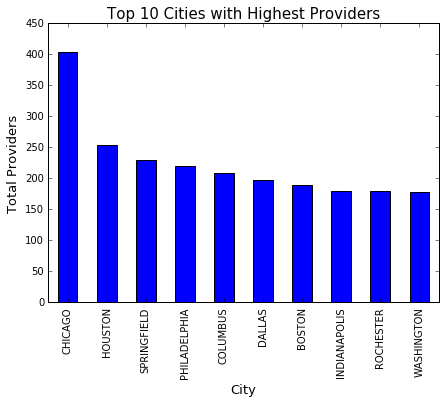

In [90]:
#Showing graph for the above data
dataxx.head(10).plot('bar')
fig = plt.gcf()
fig.set_size_inches(7, 5) 
plt.xlabel('City', size=13)
plt.ylabel('Total Requests', size=13)
plt.title('Top 10 Cities with Highest Requests Handled Analysis', size=15)
plt.show()

## Use Case 5: Top 10 Cities with Submitted Charges Analysis

In [79]:
#The column with Average Estimated Submitted Charges had $ before the value. So removing $ sign and changing the column type to 
#numeric in order to add all the values by City

#The function resetindex() is used to set the index to 0 and number it again by city list after performing the groupby function
#because there are multiple entries for same provider and different providers in same city
ESC=df_data_2['Average  Estimated Submitted Charges'].str.strip('$')
df=pd.DataFrame()
df=df.append([df_data_2['Provider City'],ESC]) #Adding 2 columns to empty dataframe
df=df.T #changing view by Transpose
df[['Average  Estimated Submitted Charges']] = df[['Average  Estimated Submitted Charges']].apply(pd.to_numeric)
df=df.groupby('Provider City')['Average  Estimated Submitted Charges'].sum().reset_index().sort_values(by="Average  Estimated Submitted Charges",ascending=False)
df=df.head(10)
df

,Provider City,Average Estimated Submitted Charges
731,HOUSTON,637329.75
279,CHICAGO,600470.36
1283,PHILADELPHIA,532466.92
923,LOS ANGELES,450460.96
375,DALLAS,386854.47
1566,SPRINGFIELD,332381.50
864,LAS VEGAS,331917.44
1384,RICHMOND,327451.97
145,BIRMINGHAM,313341.15
1196,OKLAHOMA CITY,308630.21


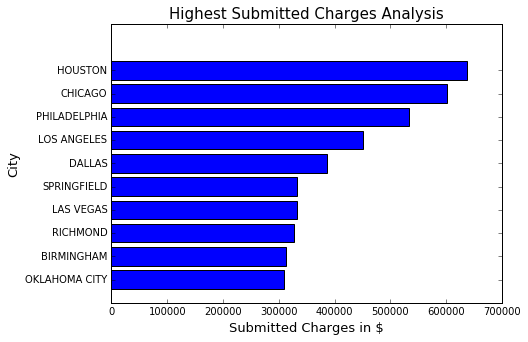

In [80]:
#plots the graph for above dataframe
fig = plt.gcf()
fig.set_size_inches(7, 5) 
plt.barh(np.arange(len(df['Average  Estimated Submitted Charges'])), df['Average  Estimated Submitted Charges'],align="center")
plt.ylabel('City', size=13)
plt.xlabel('Submitted Charges in $', size=13)
plt.title('Highest Submitted Charges Analysis', size=15)
plt.yticks(np.arange(10),df['Provider City'])
plt.gca().invert_yaxis()
plt.show()

## Use Case 6: Top 10 Cities with Average Total Payments 

In [81]:
#Analyzing Highest Averge Total Payments.
ATP=df_data_2['Average Total Payments'].str.strip('$')
new_df=pd.DataFrame()
new_df=new_df.append([df_data_2['Provider City'],ATP])
new_df=new_df.T #changes the view by Transpose
new_df[['Average Total Payments']] = new_df[['Average Total Payments']].apply(pd.to_numeric)
new_df=new_df.groupby('Provider City')['Average Total Payments'].sum().reset_index().sort_values(by="Average Total Payments",ascending=False)
new_df=new_df.head(10)
new_df

,Provider City,Average Total Payments
279,CHICAGO,103290.40
731,HOUSTON,66082.06
1566,SPRINGFIELD,63437.35
170,BOSTON,60242.52
1283,PHILADELPHIA,60153.61
375,DALLAS,51371.23
1140,NEW YORK,50535.32
319,COLUMBUS,49304.82
923,LOS ANGELES,49205.93
750,INDIANAPOLIS,45672.24


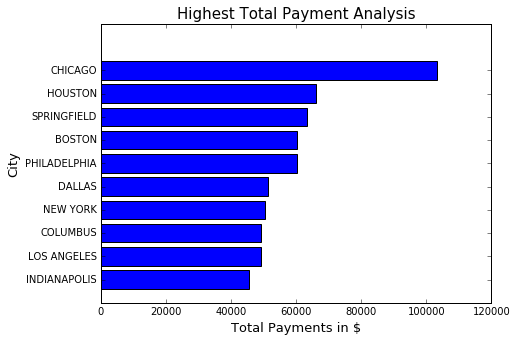

In [82]:
#Plotting the bar graph for above dataframe.
fig = plt.gcf()
fig.set_size_inches(7, 5) 
plt.barh(np.arange(len(new_df['Average Total Payments'])), new_df['Average Total Payments'],align="center")
plt.ylabel('City', size=13)
plt.xlabel('Total Payments in $', size=13)
plt.title('Highest Total Payment Analysis', size=15)
plt.yticks(np.arange(10),new_df['Provider City'])
plt.gca().invert_yaxis()
plt.show()